In [57]:
print ('hello')

hello


In [58]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━╸━━   0.0 B /  ??.?MB @  ??.?MB/s

In [59]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [60]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [61]:
def make_graph(stock_data, revenue_data, stock):
    fig=make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=("Historical Share Price","Historical Revenue"),vertical_spacing = .3)
    stock_data_specific=stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [62]:
tesla =yf.Ticker('TSLA')

In [63]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm 

--2024-05-30 01:08:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64779 (63K) [text/html]
Saving to: ‘revenue.htm.2’

revenue.htm.2       100%[===================>]  63.26K  --.-KB/s    in 0.001s  

2024-05-30 01:08:02 (48.0 MB/s) - ‘revenue.htm.2’ saved [64779/64779]



In [64]:
tesla_share_price_data=tesla.history(period='max')

In [65]:
tesla_share_price_data.reset_index(inplace=True)

In [66]:
url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data=requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [67]:
soup=BeautifulSoup(html_data,'html5lib')

In [68]:
soup.find_all('tbody')[1]

<tbody>
				
												
				<tr>
					<td style="text-align:center">2022-09-30</td>
				
				
				
										
										
						<td style="text-align:center">$21,454</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2022-06-30</td>
				
				
				
										
										
						<td style="text-align:center">$16,934</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2022-03-31</td>
				
				
				
										
										
						<td style="text-align:center">$18,756</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2021-12-31</td>
				
				
				
										
										
						<td style="text-align:center">$17,719</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2021-09-30</td>
				
				
				
										
										
						<td style="text-align:center">$13,757</td>
						
					

In [69]:
tesla_revenue=pd.DataFrame(columns=['Date','Revenue'])

In [70]:
tesla_revenue=pd.DataFrame(columns=['Date','Revenue'])

In [71]:
for row in soup.find('tbody').find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    
    tesla_revenue=tesla_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)
    tesla_revenue

In [72]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [73]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [74]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [75]:
gamestop=yf.Ticker('GME')

In [76]:
gme_data=gamestop.history(period='max')

In [77]:
gme_data.reset_index(inplace=True)

In [78]:
url2='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
data2 =requests.get(url2).text
print(data2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [79]:
soup2=BeautifulSoup(data2,'html5lib')

In [80]:
soup2.find_all('tbody')[1]

<tbody>
				
												
				<tr>
					<td style="text-align:center">2020-04-30</td>
				
				
				
										
										
						<td style="text-align:center">$1,021</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2020-01-31</td>
				
				
				
										
										
						<td style="text-align:center">$2,194</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2019-10-31</td>
				
				
				
										
										
						<td style="text-align:center">$1,439</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2019-07-31</td>
				
				
				
										
										
						<td style="text-align:center">$1,286</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2019-04-30</td>
				
				
				
										
										
						<td style="text-align:center">$1,548</td>
						
									


In [81]:
gme_revenue=pd.DataFrame(columns=['Date','Revenue'])

In [82]:
for row in soup2.find('tbody').find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    
    gme_revenue=gme_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)
    gme_revenue

In [83]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

In [84]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [85]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


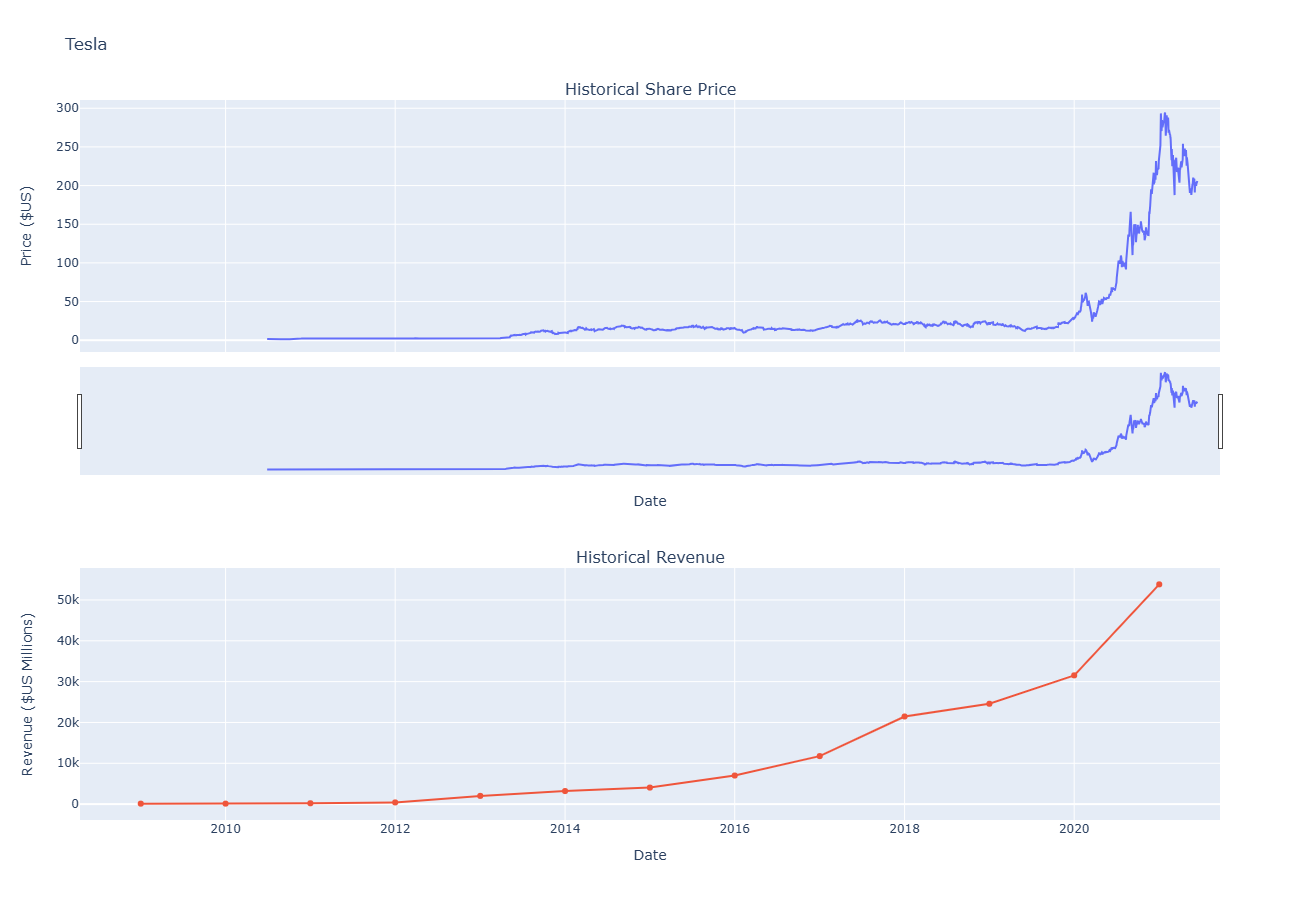

In [86]:
make_graph(_share_price_data,tesla_revenue,'Tesla')

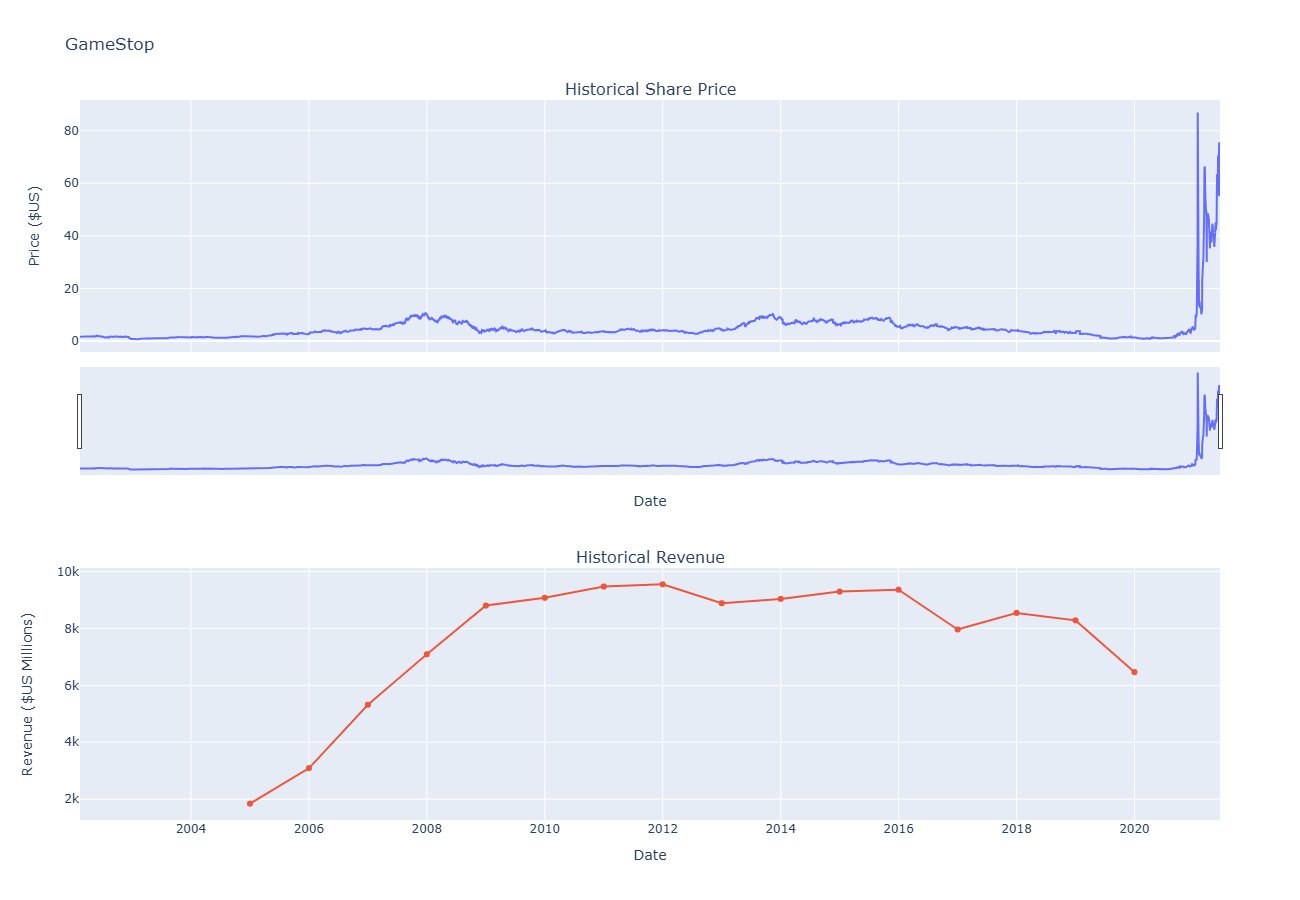

In [90]:
make_graph(gme_data,gme_revenue,'GameStop')

In [88]:
tesla_revenue.head()

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


In [89]:
gme_revenue.head()

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364
